In [1]:
import pandas as pd
import string
import random
from wellplate_piegrid import wellplate_piegrid

In [2]:
# code to generate some data
# will leave out some to show missing data is possible
def data_gen(wells=96):
    if wells == 96:
        cols = 12
        rows = 8
    else:  # 384 well
        cols = 24
        rows = 16
    row_headers = list(string.ascii_uppercase)[:rows]
    col_headers = list(range(1, cols + 1))
    samples = []
    for letter in row_headers:
        for number in col_headers:
            if ord(letter) - 64 == number:
                continue

            samples.append({
                "well": "{}{}".format(letter, number),
                "pos": random.randint(0, 6),
                "both": random.randint(1, 6),
                "neg": random.randint(0, 6),
                "none": random.randint(0, 6),
            })
    return pd.DataFrame(samples)

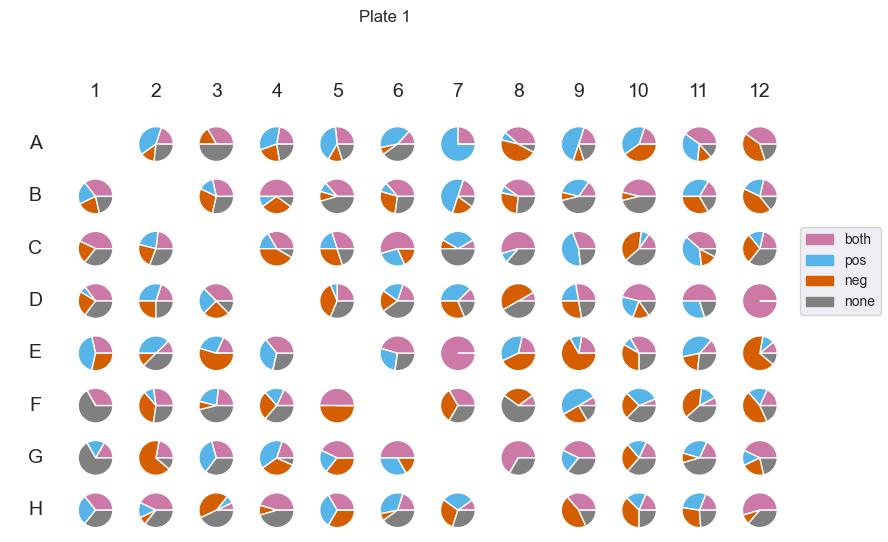

In [5]:

# Define data columns for pie charts
groups = ["both", "pos", "neg", "none"]
colors = [
    #"#0072B2FF", # dark blue
    "#CC79A7FF", # magenta
    "#56B4E9FF", # light blue
    "#D55E00FF", # orange
    "#808080FF", # grey
]

wells_list = [96]
for wells in wells_list:
    df = data_gen(wells)
    wellplate_piegrid(df, groups, "well", title="Plate 1", wells=wells, colors=colors, legend_location="right")